**Importing important Python libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, LSTM

Loading the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Samsung.csv to Samsung.csv


In [ ]:
df = pd.read_csv('Samsung.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4651.737793,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4248.232422,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4278.686523,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4217.780273,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4392.884766,46880000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5621 non-null   object 
 1   Open       5621 non-null   float64
 2   High       5621 non-null   float64
 3   Low        5621 non-null   float64
 4   Close      5621 non-null   float64
 5   Adj Close  5621 non-null   float64
 6   Volume     5621 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 307.5+ KB


Describing the dataset

In [ ]:
df.describe() #will give statistical summary

,Open,High,Low,Close,Adj Close,Volume
count,5621.000000,5621.000000,5621.000000,5621.000000,5621.000000,5.621000e+03
mean,24884.228785,25135.306885,24627.612524,24879.640633,21729.421164,2.176271e+07
std,20108.258909,20274.093474,19934.697294,20094.098853,19740.261271,1.545201e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,2078.436279,0.000000e+00
25%,10160.000000,10320.000000,10020.000000,10160.000000,7780.813477,1.179815e+07
50%,16580.000000,16800.000000,16420.000000,16600.000000,13287.424805,1.774055e+07
75%,31320.000000,31600.000000,30940.000000,31340.000000,26643.304688,2.722500e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,88908.179688,1.642150e+08


Checking for the missing values

In [ ]:
df.isnull()
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


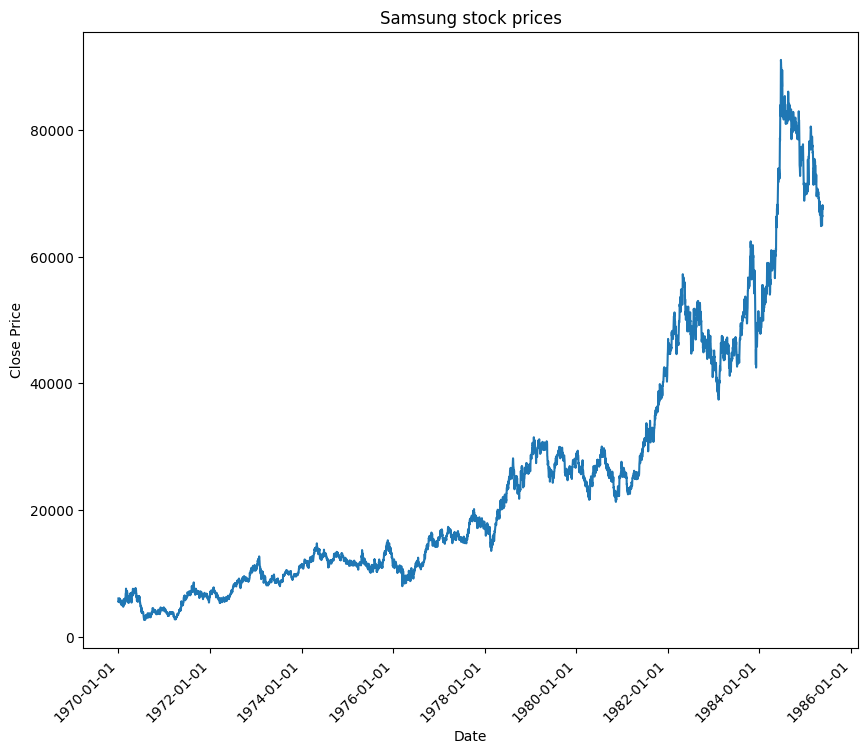

In [ ]:
plt.figure(figsize=(10,8)) #figuresize
plt.plot(df['Date'], df['Close'])
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) #To deal with the overcrowding at x axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45 , ha='right')
plt.title('Samsung stock prices') #Title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
data = df['Close'].values
data = data.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

In [ ]:
train_size= int(len(scaled_data)*0.8) #trianing data size 80% and test data size 20%
train_data=scaled_data[:train_size]
test_data=scaled_data[train_size:]

In [ ]:
def create_dataset(dataset,time_step=60):
  X , Y = [] , []
  for i in range(len(dataset) - time_step - 1):
    X.append(dataset[i:(i+time_step),0])
    Y.append(dataset[i+time_step,0])
  return np.array(X) , np.array(Y)

X_train , Y_train =create_dataset(train_data)
X_test , Y_test=create_dataset(test_data)


In [ ]:
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


Building LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=32 , epochs=50)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 1.5847e-04
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 6.5384e-05
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 4.6634e-05
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 5.1424e-05
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 4.9830e-05
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 3.7621e-05
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 3.7683e-05
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 3.1709e-05
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 3.2042e-05
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 2.5514e-05
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 2.3257e-05
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 2.3647e-05
Epoch 13/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 2.0910e-05
Epoch 14/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step -

In [ ]:

predictions= model.predict(X_test)
predictions =scaler.inverse_transform(predictions)



34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [ ]:
rmse = sqrt(mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error:" , rmse)

Root Mean Squared Error: 60083.21789296317


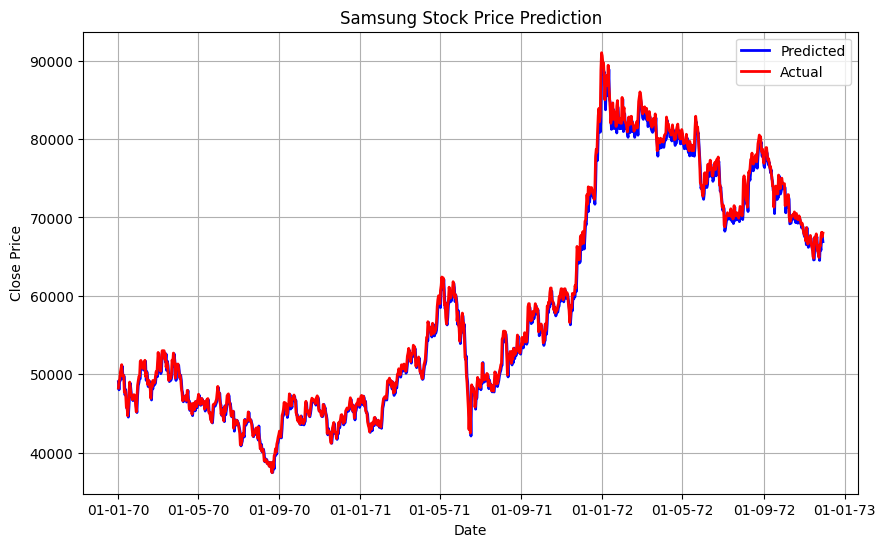

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'][-len(predictions):],predictions , label='Predicted' , color='Blue', linewidth=2)
plt.plot(df['Date'][-len(predictions):], scaler.inverse_transform(Y_test.reshape(-1,1)), label='Actual',color='Red', linewidth=2)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
plt.title('Samsung Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()